# Ermittlung der Fahrqualität von Fahrradwegen mit Fuzzy Logik

## Einleitung

Mit Fuzzy Logik soll die Oberflächenqualität von Fahrradwegen eingeordnet werden nach dem Kriterium der Fahrqualität. Hierfür werden unterschiedliche Regeln und Merkmale der erfassten Daten untersucht. Im Gegensatz zu klassischen Logik gibt es nicht nur Wahrheitswerte 0 für falsch oder 1 für wahr einee Aussage, sondern es gibt Wahrheitswerte zwischen 0 und 1 mit einem Wahrheitsgehaltwert $\mu$. Damit ist es möglich eine stetige Menge zu beschreiben. Diese Menge siehe Def. 1 wird als Fuzzy-Menge definiert. Dabei wird jeden Element $x$ Teil der Grundmenge $G$ einen Wahrheitsgehaltwert $\mu$ zugeordnet. Der Vorteil bei der Verwendung von Fuzzy Logik gegenüber Clustering Verfahren wie KMeans ist es menschliches Kausalwissen oder Verhaltensweisen zu mathematisieren. Ein Eingangswert $x$ kann mit einem Zugehörigkeitsgrad $\mu$ einem linguistischen Wert $LW$ zugeordnet werden.

$F:= \lbrace (x,\mu(x)) \: \vert \: x \in G$ und $\mu(x) \in [0,1] \rbrace$
<div style="text-align: right"><i>(1)</i></div>

## Versuchsbeschreibung

Für die Einordnung der Daten in Klassen werden Regeln benötigt. Diese werden dann in eine mathematische Gleichung umgewandelt. Die Frage die experimentell zu beantworten gilt ist, welche Regeln sind sinnvoll. Die Anzahl der Repräsentanten für jede Klasse sollte ungefähr gleich sein. Um später ein einseitiges Lernen mit Faltungsnetzen zu vermeiden. Als Merkmal wird die Standardabweichung der Z-Achsen Beschleunigung $a$ und die Geschwindigkeit untersucht. 

Die Hypothese ist das die Geschwindigkeit als Merkmal relevant ist, weil bei einer steigenden Geschwindigkeit auch die Bewegungsunschärfe zunimmt. Allerdings erhöht eine starke Erschütterung oder eine lange Belichtungszeit auch die unschärfer der Bildaufnahme. In diesem Versuchen wird auch untersucht ob eine Unterteilung der Daten anhand der Geschwindigkeit zu einem besseren Ergebnis im Sinne der Genauigkeit bei der Klassifizierung führt.
In den Versuchen wird die Bibliothek [Scikit Fuzzy (skfuzzy)](https://pythonhosted.org/scikit-fuzzy/) genutzt.

### Versuch 1: Referenzstrecken

Um die Standardabweichung der Z-Achsen Beschleunigung zu unterteilen in Abstufungen werden sinnvolle Grenzwerte benötigt. Als erste Überlegung könnten die Dateien gleichmäßig unterteilt werden indem die Daten anhand der Erschütterung sortiert werden.  Der Nachteil ist, dass die Werte nicht gleichmäßig verteilt sind (siehe Abb. 1). Die Werte auf das Intervall [0,1] zu normieren und dann einen Prozentwert als Unterteilung zu wählen ist auch nicht sinnvoll. Der Wertebereich ist nämlich nicht gleichmäßig verteilt.

<img src="../daten/abbildungen/histogrammStandardabweichung.png" alt="Histogramm der Z-Achsen Standardabweichung Beschleunigung" />
Abbildung 1: Histogramm der Z-Achsen Beschleunigung Standardabweichung für die Datensätze 37 bis 42

Die Idee ist mit Referenzstecken für eine leichte und hohe Erschütterung eine Unterteilung vorzunehmen. Dabei können für die Zwischenstufen von leicht bis zu einer hohen Erschütterung die Mittelwerte genutzt werden. Für die Referenzstrecke wird ein Abschnitt ausgewählt, welcher von der Unebenheit möglichst gleichbleibt. Der Mittelwert von der Z-Achsen Standardabweichung wird dann als Maximalwert $\mu$ gewählt für die Zuordnungsfunktion des Fuzzy Systems.  

Es werden in diesem Versuch also zwei Referenzstrecken gesucht, eine mit leichter und eine mit hoher Erschütterung.  

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas 
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid

In [101]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_38/merkmale.csv")

### Versuch 1

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


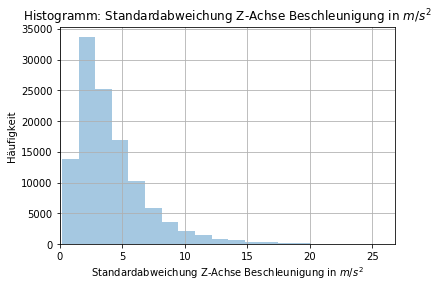

In [24]:
plt.title("Histogramm: Standardabweichung Z-Achse Beschleunigung in $m/s^2$")
sns.distplot(featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'], bins=20, kde=False)
plt.xlim(0,featuresDf['Standardabweichung Z-Achse Beschleunigung in m/s^2'].max())
plt.grid()
plt.ylabel('Häufigkeit')
plt.xlabel('Standardabweichung Z-Achse Beschleunigung in $m/s^2$')
#plt.savefig("histogrammStandardabweichung")

In [10]:
# Lade Bilder in eine Liste
images = []
# Hier können die Datensätze ausgewählt werden
datasets = ['38']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []

In [11]:
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("E:/bachelor/daten/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    folders = sorted(folders, key=int) #sortiert die Reihenfolge de Ordner aufsteifend
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        files = os.listdir(filesPath)
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            images.append(cv2.imread(filesPath + name)) # Bild wird gelesen

In [236]:
# Daten mit hoher Erschütterung
startIndex = 17712
stopIndex = 17978

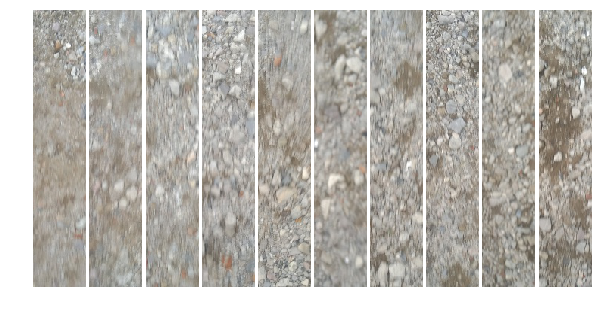

In [237]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(10,10))
# Anzahl der Bilder >= 10
imageToShow = 10
# Start Index des ersten Bildes
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.savefig("schwereErschütterungReferenzstrecke.png")

In [238]:
i = startIndex
counter = 0
accZSum = 0
while i <= stopIndex:
    accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    print(accZ)
    accZSum = accZSum + accZ
    i = i + 1
    counter = counter + 1

6.69653
8.2377
7.50788
10.27772
5.74694
7.22992
6.12928
4.70868
4.82619
4.26116
3.64326
5.19342
5.48682
5.3629
3.73353
8.48278
6.08752
4.87249
3.88058
4.37962
4.00087
5.52656
3.75102
3.4189
4.09006
4.27043
4.02936
5.93557
6.56662
5.05002
7.37563
5.89575
6.85644
6.1187
7.95716
7.20688
9.17463
8.00581
8.72167
6.85615
5.44844
9.92345
9.57052
8.37717
7.1323
7.59929
7.58598
11.79503
9.95098
8.66844
8.08859
5.18703
6.85266
6.89785
8.66196
9.43087
10.98333
7.3592
13.54951
6.44722
5.79992
6.33435
5.78541
7.33005
6.86387
10.27252
9.11317
8.51844
8.94674
16.08015
7.50914
6.84443
6.26474
8.63232
9.05551
9.08606
8.96439
7.19295
7.27328
7.90624
9.14035
7.28291
6.35884
7.11522
7.24345
6.41296
4.94032
6.70496
4.84862
4.35601
3.97626
3.43486
5.48729
6.50279
6.1676
5.99233
8.21102
9.2493
8.29028
6.58245
5.59774
4.28691
4.80827
5.01009
8.06062
5.55403
4.35989
4.16983
7.61365
6.81084
5.81027
6.53059
4.23453
5.63837
5.74116
7.48871
5.86913
6.29385
8.13598
5.1125
4.2329
4.19806
5.82415
3.93373
4.94915
4.28

In [131]:
counter

267

In [132]:
accZSum / counter

7.2919992134831499

In [240]:
# Daten mit leichter Erschütterung
startIndex = 8500
stopIndex = 9350
i = startIndex
counter = 0
accZSum = 0
while i <= stopIndex:
    accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].iloc[i]
    print(accZ)
    accZSum = accZSum + accZ
    i = i + 1
    counter = counter + 1

1.27246
1.06071
1.25678
1.12558
1.35993
2.83599
1.26829
1.85919
1.36033
1.44918
1.33229
1.36046
1.63722
1.07053
1.53888
1.67467
1.63979
0.90516
1.34919
1.49638
1.30034
0.85515
1.74252
1.17465
1.93388
1.09654
1.91396
2.29234
1.56733
1.53513
1.78104
1.63076
2.22954
1.40565
1.86918
1.52927
1.59834
1.67127
1.47425
1.1461
1.31583
2.12431
1.19089
1.34726
1.6299
1.22741
1.45988
1.69537
2.24982
2.29837
1.78914
1.35678
1.49509
1.17581
1.31799
1.33538
1.92023
1.63953
2.43003
1.72016
1.17378
1.81576
1.44083
1.45612
0.809
1.84594
1.57236
1.32541
1.14504
1.20036
2.08406
1.72769
1.11904
1.01417
1.69579
3.27263
3.36548
1.26871
0.81666
1.36649
1.40663
1.22256
0.86423
0.95443
1.91681
2.07641
1.67819
1.60547
1.43341
1.20359
1.20682
1.04933
2.21527
1.14027
1.26651
1.05249
1.70923
1.15208
1.63913
1.3333
1.25241
1.51125
0.97819
1.36067
1.96874
1.49825
1.43683
1.36464
1.98965
1.25276
1.41905
1.48538
1.26666
2.10063
2.27936
2.9977
1.68842
1.48139
1.80554
1.50897
1.32473
1.64625
1.36758
1.72717
1.2375
1.66
1.

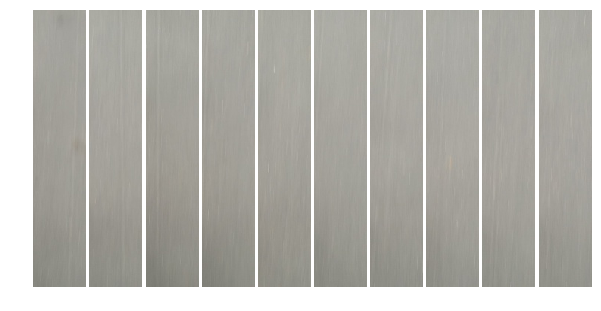

In [241]:
# Plot Beispiel Bilder
fig = plt.figure(1, figsize=(10,10))
# Anzahl der Bilder >= 10
imageToShow = 10
# Start Index des ersten Bildes
grid = ImageGrid(fig, 111, nrows_ncols=(int(imageToShow/10), 10), axes_pad=0.05)
for i, img in enumerate(images[startIndex: startIndex + imageToShow]):
    ax = grid[i]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
plt.savefig("leichteErschütterungReferenzstrecke")

In [134]:
accZSum / counter

1.4935777320799042

In [135]:
percent25DataIndex = ((featuresDf.shape[0]) * 1/5)  - 1
percent25DataIndex

7106.8

In [79]:
accZ = featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"]
accZ = accZ.sort_values()
accZ.iloc[int(percent25DataIndex*1)]

1.8516300000000001

In [157]:
featuresDf["Standardabweichung Z-Achse Beschleunigung in m/s^2"].max()

26.484359999999999

In [219]:
vibration = ctrl.Antecedent(np.arange(0, 30, 1), 'Standardabweichung Beschleunigung der Z-Achse in m/s^2')
qualityWay = ctrl.Consequent(np.arange(0, 5, 1), 'Fahrqualität')
 
vibration['sehr niedrig'] = fuzz.trimf(vibration.universe, [0, 0, 2])
vibration['niedrig'] = fuzz.trimf(vibration.universe, [0, 2, 4])
vibration['mittel'] = fuzz.trimf(vibration.universe, [2, 4.0, 5])
vibration['hoch'] = fuzz.trimf(vibration.universe, [4, 6, 7])
vibration['sehr hoch'] = fuzz.trimf(vibration.universe, [5, 7.5, 26])


qualityWay['sehr gut'] = fuzz.trimf(qualityWay.universe, [3, 4, 5])
qualityWay['gut'] = fuzz.trimf(qualityWay.universe, [2, 3, 4])
qualityWay['mittel'] = fuzz.trimf(qualityWay.universe, [1, 2, 3])
qualityWay['schlecht'] = fuzz.trimf(qualityWay.universe, [0, 1, 2])
qualityWay['sehr schlecht'] = fuzz.trimf(qualityWay.universe, [0, 0, 1])

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


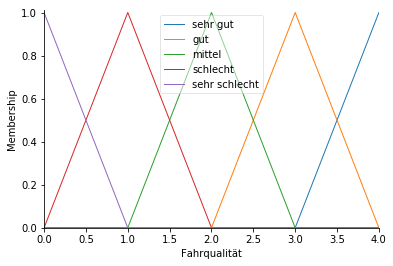

In [220]:
qualityWay.view()

C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


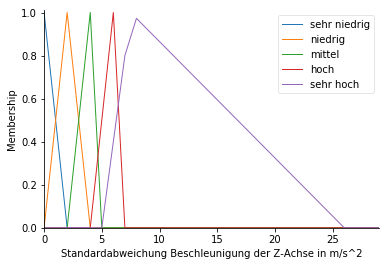

In [221]:
vibration.view()

In [203]:
rule1 = ctrl.Rule(vibration['hoch'], qualityWay['schlecht'])
rule2 = ctrl.Rule(vibration['niedrig'], qualityWay['gut'])

In [96]:
way_ctrl = ctrl.ControlSystem([rule1,rule2])

In [97]:
wayQ = ctrl.ControlSystemSimulation(way_ctrl)

In [104]:
wayQ.input['Standardabweichung Beschleunigung der Z-Achse in m/s^2'] = 15
wayQ.compute()

5.0


C:\Users\morro\AppData\Local\conda\conda\envs\bachelor\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


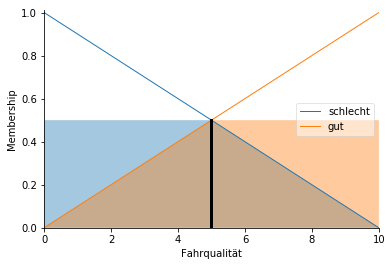

In [105]:
print(wayQ.output['Fahrqualität'])
qualityWay.view(sim=wayQ)